# Multi-Class Perceptrons 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs #for data generatio

In [4]:
X, y = make_blobs(n_samples=50, centers=3, cluster_std=0.2,n_features=2,center_box=(1,5),random_state=104)

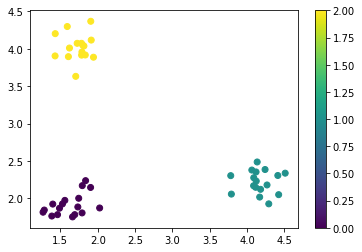

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.colorbar()

### draw Percepton layout 
* Hint: now we have more then one Perceptron
* write math. formulation as linear model

### Transform lables to one-hot coding
* Hint: Use Scikit-Learn

In [6]:
#one hot
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y_oh = enc.fit_transform(y.reshape(-1, 1)).toarray()
print(y_oh[:10,:])#first 10 samples

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


### Manually find parameters $w$ and $b$ for 
* for each Perceptron seperately
* then combine to single matrix multiplication formulation

In [8]:
#helper function to find parameters
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

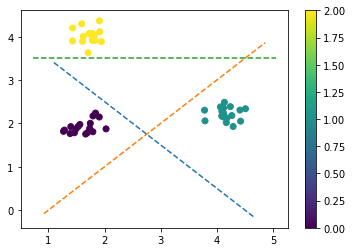

In [9]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.colorbar()
abline(-1,4.5) #purple
abline(1,-1)#green
abline(0,3.5)#yellow
#plt.gca().set_aspect('equal', adjustable='box')

In [197]:
#purple class y=0
b_purple=3#-4.5#np.array([0,5]) 
w_purple=np.array([-0.7,-0.7])

# green class y=1
b_green=-0.1#np.array([0,-10])
w_green=np.array([0.5,-0.5])

#yellow class y=2
b_yellow=-3.5#np.array([0,6]) 
w_yellow=np.array([0,1])

#example how signs flip
#b_yellow=3.5#np.array([0,6]) 
#w_yellow=np.array([0,-1])

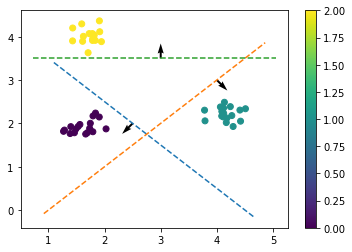

In [198]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.colorbar()
abline(-1,4.5) #purple
abline(1,-1)#green
abline(0,3.5)#yellow
plt.quiver(2.5,2,w_purple[0],w_purple[1])# plot normal vector
plt.quiver(4,3,w_green[0],w_green[1])# plot normal vector
plt.quiver(3,3.5,w_yellow[0],w_yellow[1])# plot normal vector
#plt.gca().set_aspect('equal', adjustable='box')

#### test single perceptrons by class


In [199]:
# purple class
t=np.sign(w_purple.dot(X.T)+b_purple)
print("purple",t)#need to rescale y again!

purple [ 1. -1. -1. -1. -1. -1. -1.  1. -1. -1.  1. -1.  1. -1. -1.  1.  1. -1.
 -1.  1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1.  1. -1. -1. -1.
 -1.  1. -1.  1.  1. -1.  1. -1. -1.  1.  1. -1.  1. -1.]


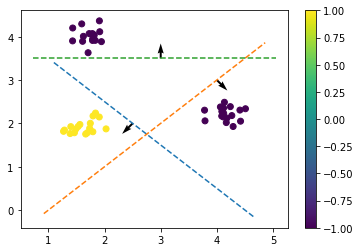

In [200]:
plt.scatter(X[:,0],X[:,1],c=t)
plt.colorbar()
abline(-1,4.5) #purple
abline(1,-1)#green
abline(0,3.5)#yellow
plt.quiver(2.5,2,w_purple[0],w_purple[1])# plot normal vector
plt.quiver(4,3,w_green[0],w_green[1])# plot normal vector
plt.quiver(3,3.5,w_yellow[0],w_yellow[1])# plot normal vector

In [201]:
# green class
t=np.sign(w_green.dot(X.T)+b_green)
print("green",t) 

green [-1.  1. -1.  1. -1. -1.  1. -1. -1. -1. -1. -1. -1.  1.  1. -1. -1.  1.
  1. -1. -1.  1. -1.  1.  1.  1. -1.  1. -1.  1. -1. -1. -1.  1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1.  1. -1.  1.]


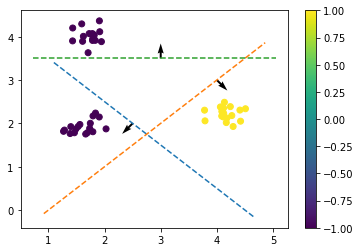

In [202]:
plt.scatter(X[:,0],X[:,1],c=t)
plt.colorbar()
abline(-1,4.5) #purple
abline(1,-1)#green
abline(0,3.5)#yellow
plt.quiver(2.5,2,w_purple[0],w_purple[1])# plot normal vector
plt.quiver(4,3,w_green[0],w_green[1])# plot normal vector
plt.quiver(3,3.5,w_yellow[0],w_yellow[1])# plot normal vector

In [203]:
# yellow class
t=np.sign(w_yellow.dot(X.T)+b_yellow)
print("yellow",t)

yellow [-1. -1.  1. -1.  1.  1. -1. -1.  1.  1. -1.  1. -1. -1. -1. -1. -1. -1.
 -1. -1.  1. -1.  1. -1. -1. -1. -1. -1.  1. -1.  1. -1. -1. -1.  1.  1.
  1. -1.  1. -1. -1.  1. -1.  1. -1. -1. -1. -1. -1. -1.]


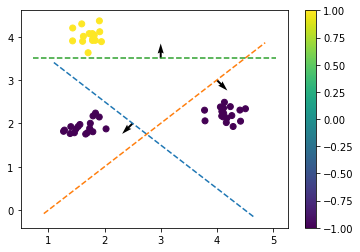

In [204]:
plt.scatter(X[:,0],X[:,1],c=t)
plt.colorbar()
abline(-1,4.5) #purple
abline(1,-1)#green
abline(0,3.5)#yellow
plt.quiver(2.5,2,w_purple[0],w_purple[1])# plot normal vector
plt.quiver(4,3,w_green[0],w_green[1])# plot normal vector
plt.quiver(3,3.5,w_yellow[0],w_yellow[1])# plot normal vector

## Add non-linear activation / loss -> $softmax$
* implement a $softmax$ function
* replace $sgn$ by $softmax$
* plot confidence of the test samples

In [247]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x)
    return e_x / e_x.sum(axis=1)[:,None] #dnormalize by sum of activations - None needed to devide mat by vec

In [248]:
#combine single perceptrons in one W matrix and b vector
W=np.vstack((w_purple,w_green,w_yellow))
b=np.array([b_purple,b_green,b_yellow])
print(W.shape,b.shape)

(3, 2) (3,)


In [249]:
pre=softmax(W.dot(X.T).T+b)
print(pre.shape)

(50, 3)


In [256]:
#have a look at the softmax results 
pre[:10,:]

array([[0.63969126, 0.27812591, 0.08218283],
       [0.08345773, 0.79344518, 0.12309709],
       [0.24399463, 0.17603198, 0.57997339],
       [0.12310349, 0.79005904, 0.08683746],
       [0.14478905, 0.11675518, 0.73845577],
       [0.16758319, 0.11790375, 0.71451305],
       [0.05921267, 0.84229068, 0.09849665],
       [0.5308077 , 0.33954828, 0.12964402],
       [0.19429502, 0.1313266 , 0.67437838],
       [0.16935004, 0.14207815, 0.6885718 ]])

In [258]:
#check if probability of classes sum to one
pre.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [253]:
#get pos of max prob. class
pre.argmax(axis=1)


array([0, 1, 2, 1, 2, 2, 1, 0, 2, 2, 0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1,
       2, 1, 1, 1, 0, 1, 2, 1, 2, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2,
       1, 0, 0, 1, 0, 1])

In [254]:
#see if prediction is correct
y==pre.argmax(axis=1)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])